# Data Mining Project 

# CS 422

# Amandeep Singh oberoi

In [1]:
#import necessary libraries
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from numpy import set_printoptions
from sklearn2pmml.pipeline import PMMLPipeline
from sklearn import tree 
import graphviz
from sklearn.feature_selection import f_classif
from sklearn_pandas import DataFrameMapper
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn import metrics
from numpy import mean
from numpy import std
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MaxAbsScaler,RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from scipy.stats import boxcox,yeojohnson
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
#pull zip data: unzip and use delimiter to present the data

In [3]:
df=pd.read_csv(r'C:\Users\aman\Desktop\IIT\DATA MINING CS 422\project\data_public.csv.gz',compression='gzip',header=0,sep=',',quotechar='"')

In [4]:
df.head() #columns 1-15 are features(predictor values) and Class are the labels or values to be predicted(target values)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


In [5]:
df.info()           #data has no null values and all values are quantitaive with d_type=float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 16 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   A       1200000 non-null  float64
 1   B       1200000 non-null  float64
 2   C       1200000 non-null  float64
 3   D       1200000 non-null  float64
 4   E       1200000 non-null  float64
 5   F       1200000 non-null  float64
 6   G       1200000 non-null  float64
 7   H       1200000 non-null  float64
 8   I       1200000 non-null  float64
 9   J       1200000 non-null  float64
 10  K       1200000 non-null  float64
 11  L       1200000 non-null  float64
 12  M       1200000 non-null  float64
 13  N       1200000 non-null  float64
 14  O       1200000 non-null  float64
 15  Class   1200000 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 146.5 MB


In [6]:
df.describe()       # describe used to get the first hand information about the data: mean, std and max are important

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,5.068656e+01,-1.883373e+01,7.162152e+01,-1.355120e+01,2.944177e+01,-6.185189e+00,3.174186e+01,5.112504e+01,3.300077e+01,4.092546e+01,7.938340e+01,-6.746540e+00,-4.232290e+01,4.949012e+01,5.980333e+01,2.167323e+00
std,1.292492e+02,1.446355e+01,1.052808e+02,4.689774e+01,7.282278e+01,7.309100e+01,6.660329e+01,1.034053e+02,4.217119e+01,7.694386e+01,9.484003e+01,1.557490e+01,1.791142e+01,6.728231e+01,6.677712e+01,6.874930e-01
min,-7.308940e+01,-8.322357e+01,-5.972853e+01,-1.375818e+02,-3.829826e+01,-1.485917e+02,-6.654137e+01,-4.246089e+01,-1.818542e+01,-1.123844e+02,-1.415233e+01,-6.271828e+01,-8.144988e+01,-2.057979e+01,-1.283059e+01,1.000000e+00
25%,-3.793679e+01,-1.786669e+01,7.553164e+00,-1.471337e+01,-2.436286e+01,-3.072492e+01,-3.484185e+00,-2.629661e+01,-7.594991e+00,2.108044e+01,2.419273e+00,-8.875128e+00,-5.567326e+01,-7.131906e+00,1.628438e-01,2.000000e+00
50%,-3.197847e+01,-1.369876e+01,1.348796e+01,-8.004308e+00,-1.897058e+01,-2.475391e+01,1.491431e+00,-1.817028e+01,3.769369e+01,2.717432e+01,2.652955e+01,-1.079123e+00,-5.297585e+01,1.462293e+01,4.689262e+01,2.000000e+00
75%,2.280020e+02,-1.055606e+01,2.123439e+02,1.955806e+01,1.289018e+02,7.834417e+01,1.151840e+02,1.915891e+02,7.984842e+01,1.253846e+02,2.046458e+02,3.334451e+00,-2.208504e+01,1.363603e+02,1.451293e+02,3.000000e+00
max,2.687738e+02,4.460108e+00,2.561698e+02,3.263799e+01,1.579843e+02,1.229186e+02,1.660534e+02,2.329496e+02,1.112970e+02,1.755397e+02,2.598003e+02,2.159496e+01,1.032828e+01,1.789303e+02,1.807011e+02,3.000000e+00


In [7]:
#prof = ProfileReport(df,minimal=True)
#prof                                                    #profile report is preprocessing tool used for 
                                                        #automated EDA of the data

In [8]:
# we see that Class has 3 distinct labels. So it is a multiclass classification problem

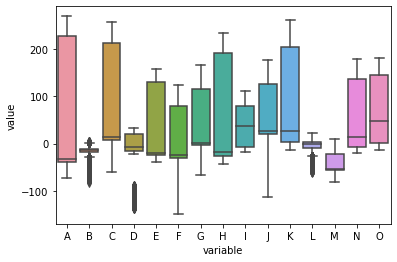

In [9]:
sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:,:15]))
plt.show()

In [10]:
# boxplot shows that group B, C, L have potential outliers. We all see that some features have higher spread and
#even negative median value

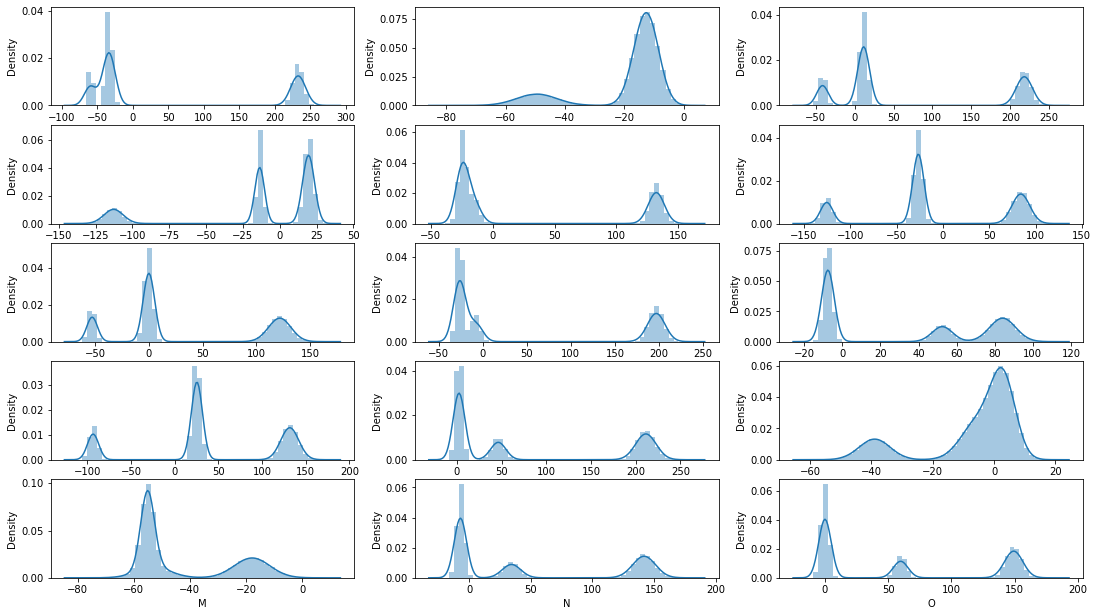

In [11]:
n_rows=5
n_cols=3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(18.5, 10.5, forward=True)
for i, column in enumerate(df.columns[:15]):
    sns.distplot(df[column],ax=axes[i//n_cols,i%n_cols])
    
    
# distplots for univariate distribution and we see that the data has multiple peaks or modes. It dosn't follow normal 
#distribution

In [12]:
# for getting normal distribution we can use data transformation method such as yeo-johnson(works for negetive and 0 )
# used to mitigate the outliers and achieve similarity to normal distribution

In [13]:
#Now we need to focus on feature engineering. We need to see which features actually have more importance with
#respect to the final classification. This can help improve accuracy of final model.

In [14]:
features=df.columns
sc=StandardScaler()
scales =sc.fit_transform(df.drop('Class',axis=1))
scales=pd.DataFrame(scales,columns=features[:15])


#used standard scaler to save time in pca and stop the bias of pca towards high variance data

In [15]:
#SCALE=sklearn.preprocessing.MinMaxScaler()
#df.iloc[:,:15]=SCALE.fit_transform(df.iloc[:,:15])
#df

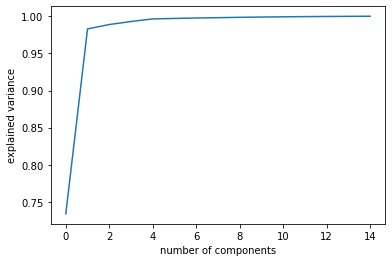

In [16]:
#Pca is used for feature selection process, it help in reducing dimensionality and hence improve computation speed
#and reduces overfitting


pca=decomposition.PCA(n_components=15)
pca.fit(scales)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [17]:
print("Explained Variance:\n %s" % (pca.explained_variance_ratio_))


Explained Variance:
 [7.33864677e-01 2.49030223e-01 5.94772600e-03 4.07704155e-03
 3.46584323e-03 6.57804933e-04 5.61838589e-04 4.71665772e-04
 4.61722639e-04 3.82898239e-04 3.11013079e-04 2.56592626e-04
 2.01142386e-04 1.84748847e-04 1.25062088e-04]


In [18]:
X=df.iloc[:,:15]
Y=df.iloc[:,15:16]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
training_data=pd.concat([X_train,Y_train],axis=1)

In [19]:
SCALE=sklearn.preprocessing.MinMaxScaler()
X1=SCALE.fit_transform(X)
X1=pd.DataFrame(X1)
X1.columns=df.columns[:15]
b_features= SelectKBest(score_func=chi2, k = 5)
best_features= b_features.fit(X1,Y)
dfscore=pd.DataFrame(best_features.scores_)
dfcols=pd.DataFrame(X.columns)
features_score_chi=pd.concat([dfcols,dfscore],axis=1)
features_score_chi.columns=['features','chi_score']
features_score_chi = features_score_chi.sort_values(by=['chi_score'], ascending=False)
features_score_chi

,features,chi_score
8,I,0.280697
3,D,0.256441
0,A,0.232314
7,H,0.231164
2,C,0.230855
4,E,0.213254
13,N,0.206008
10,K,0.204862
14,O,0.195298
5,F,0.194930


In [20]:
b_features2 = SelectKBest(score_func=f_classif, k=5)
best_features1= b_features2.fit(X1,Y)
dfscore1=pd.DataFrame(best_features1.scores_)
features_score_f_classif=pd.concat([dfcols,dfscore1],axis=1)
features_score_f_classif.columns=['features','f_classif_score']
features_score_f_classif = features_score_f_classif.sort_values(by=['f_classif_score'], ascending=False)
features_score_f_classif

,features,f_classif_score
1,B,1.676943
11,L,1.337819
3,D,1.230817
5,F,0.705404
9,J,0.589136
8,I,0.523045
6,G,0.475561
2,C,0.432104
13,N,0.318088
14,O,0.307825


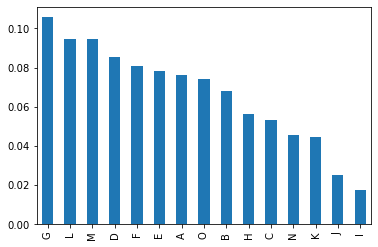

In [21]:
model1=ExtraTreesClassifier(max_depth=3,n_estimators=15)
model1.fit(X,Y)
imp=pd.Series(model1.feature_importances_,index=X.columns)
imp.nlargest(15).plot(kind='bar')
plt.show()

In [22]:
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 1)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
#print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 1
Feature Ranking: [ 8  3  7  9  2  6 11 12 14  5 10 15  1 13  4]


In [23]:
rfe = RFE(estimator=DecisionTreeClassifier(max_depth=3), n_features_to_select=1)

rfe.fit(X, Y)
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 15.000
Column: 1, Selected False, Rank: 14.000
Column: 2, Selected False, Rank: 13.000
Column: 3, Selected False, Rank: 12.000
Column: 4, Selected False, Rank: 11.000
Column: 5, Selected False, Rank: 2.000
Column: 6, Selected False, Rank: 10.000
Column: 7, Selected False, Rank: 9.000
Column: 8, Selected False, Rank: 4.000
Column: 9, Selected False, Rank: 8.000
Column: 10, Selected False, Rank: 3.000
Column: 11, Selected False, Rank: 7.000
Column: 12, Selected False, Rank: 5.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected False, Rank: 6.000


In [24]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
X1=pd.DataFrame(X,columns=df.columns[:15])
X1

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,-24.786494,-10.521166,15.328284,17.262938,-27.448018,-31.558757,-2.868037,-20.349796,-8.638853,28.820524,1.947061,1.783621,-50.709145,-8.420400,-2.577617
1199996,-39.555214,-14.965132,18.463720,18.127835,-26.634431,-24.569557,0.058442,-22.117532,-8.618300,30.395884,-8.075257,0.906029,-55.225171,-0.794141,-0.433467
1199997,223.972417,-17.367537,213.833218,-11.930115,127.344101,88.436019,118.061876,199.927061,80.655941,148.959437,202.638812,-1.997524,-14.789752,149.573291,144.282910
1199998,-58.147084,-42.018043,-42.593154,-122.341090,-10.619619,-119.306608,-57.133497,-9.801039,54.972452,-88.305990,34.893474,-35.693106,-59.268435,33.829905,54.898866


In [25]:
sfs = SFS(DecisionTreeClassifier(max_depth=3),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'accuracy',
          cv = 0)
sfs.fit(X1, Y)
sfs.k_feature_names_     

('A', 'B', 'C', 'D', 'E', 'G', 'H', 'I', 'J', 'K')

In [26]:
sbs = SFS(RandomForestClassifier(max_depth=3,n_estimators=20),
         k_features=10,
         forward=False,
         floating=False,
         scoring = 'accuracy',
         cv=0)
sbs.fit(X1, Y)
sbs.k_feature_names_

('B', 'C', 'F', 'G', 'H', 'K', 'L', 'M', 'N', 'O')

In [27]:
training_data=pd.concat([X_train,Y_train],axis=1)
features

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'Class'],
      dtype='object')

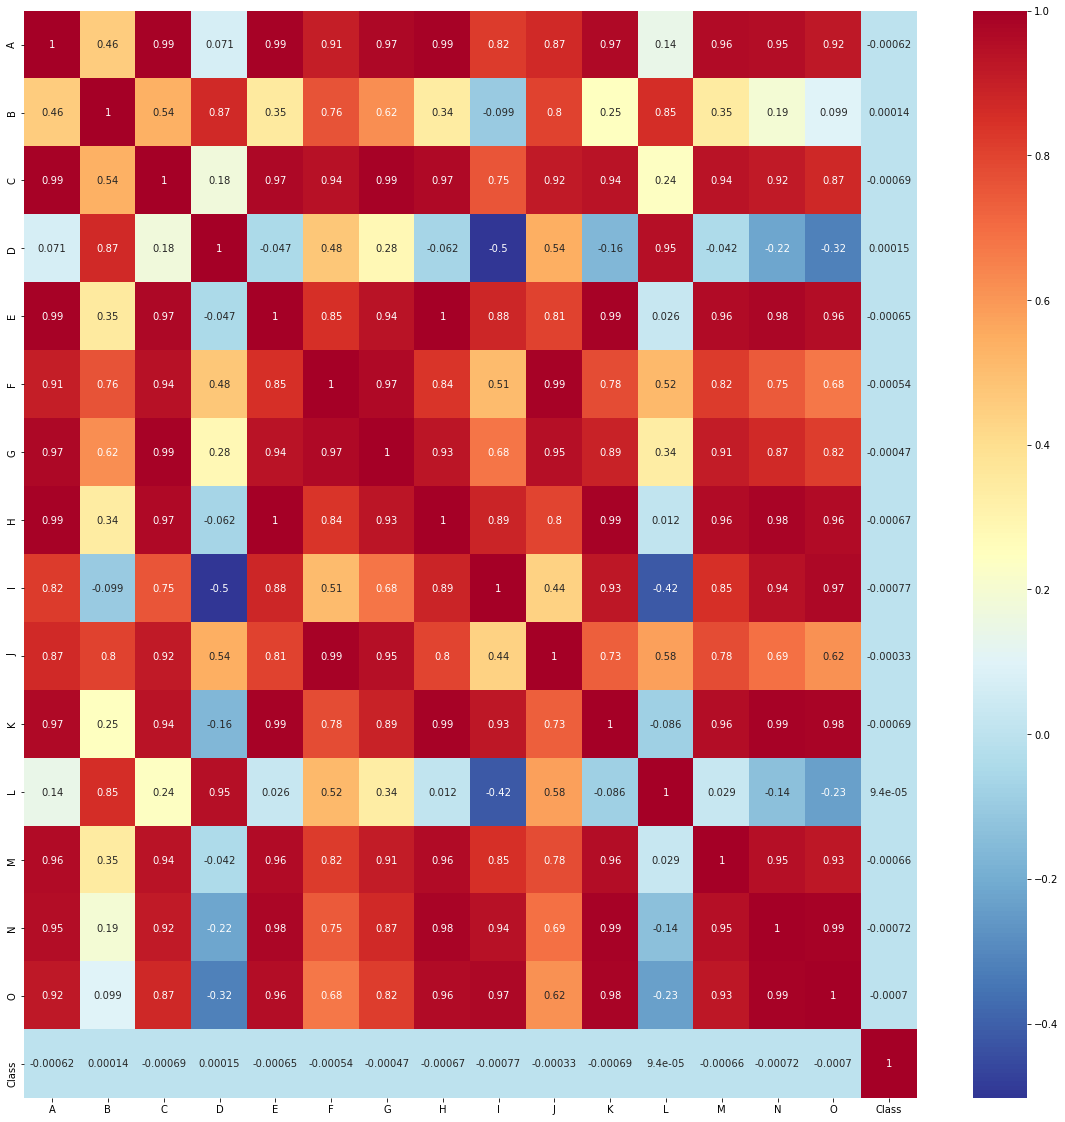

In [28]:
correlation1=df.corr('pearson')
feat=correlation1.index
plt.figure(figsize=(20,20))
plot1=sns.heatmap(df[feat].corr(),annot=True,cmap='RdYlBu_r')

In [29]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 10))

Top Absolute Correlations
E  H    0.997116
K  N    0.992158
A  C    0.991999
H  K    0.990875
A  E    0.990703
F  J    0.989868
E  K    0.989217
N  O    0.988920
A  H    0.988807
C  G    0.988351
dtype: float64


In [30]:
features='ABCDEFGHIJKLMNO'
for i in range(0,len(features)):
    pipeline=PMMLPipeline([('mapper',DataFrameMapper([(X_train.columns.drop([features[i:i+1]]).values,[PowerTransformer(method = 'yeo-johnson')])])),('pca',PCA(n_components=1)),('classifier',ExtraTreesClassifier(max_depth=5))])
    pipeline.fit(training_data.drop([features[i:i+1]],axis=1),training_data['Class'])
    results=pipeline.predict(X_test)
    actual=np.concatenate(Y_test.values)
    print("Dropped feature:",features[i:i+1],", Accuracy:",metrics.accuracy_score(actual,results))

Dropped feature: A , Accuracy: 0.4993875
Dropped feature: B , Accuracy: 0.49937916666666665
Dropped feature: C , Accuracy: 0.4993875
Dropped feature: D , Accuracy: 0.49940416666666665
Dropped feature: E , Accuracy: 0.4993958333333333
Dropped feature: F , Accuracy: 0.4993875
Dropped feature: G , Accuracy: 0.4993916666666667
Dropped feature: H , Accuracy: 0.4994
Dropped feature: I , Accuracy: 0.4993958333333333
Dropped feature: J , Accuracy: 0.4993875
Dropped feature: K , Accuracy: 0.4994125
Dropped feature: L , Accuracy: 0.4994
Dropped feature: M , Accuracy: 0.4993916666666667
Dropped feature: N , Accuracy: 0.49940416666666665
Dropped feature: O , Accuracy: 0.49940833333333334
